Các phương pháp Augment dữ liệu chứng khoán

Gaussian Noise : Nhiễu sẽ được tạo ra bằng cách thêm các giá trị từ một phân phối chuẩn (Gaussian noise) hoặc phân phối chuẩn hóa theo các tham số cụ thể. Ví dụ : nếu giá cổ phiếu ban đầu là 100, bạn có thể thêm một mức biến động ngẫu nhiên từ -0.5% đến +0.5% để tạo ra các giá trị mới như 99.5 hoặc 100.5.

Advance : Gaussian Noise với độ lệch chuẩn thay đổi ngẫu nhiên 
+ Lý do sử dụng: Trong thực tế, giá cổ phiếu không bao giờ ổn định mà luôn có sự biến động ngẫu nhiên do nhiều yếu tố như cung cầu, tin tức, và tâm lý thị trường. Việc thêm nhiễu ngẫu nhiên vào dữ liệu gốc giúp mô phỏng tình huống biến động nhỏ có thể xảy ra trong thời gian thực, từ đó giúp mô hình quen với các tình huống biến động nhẹ.
+ Nguyên nhân: Nếu mô hình chỉ học từ dữ liệu gốc mà không được phơi nhiễm với những biến động ngẫu nhiên, nó có thể quá nhạy cảm với sự thay đổi nhỏ khi ứng dụng trong thực tế. Gaussian Noise giúp mô hình trở nên linh hoạt hơn.
+ Lợi ích: Tăng tính đa dạng cho dữ liệu đầu vào, giảm thiểu overfitting (quá khớp) và giúp mô hình tổng quát hóa tốt hơn trong các tình huống có sự biến động nhỏ.
+ Ví dụ :  Nếu cổ phiếu của một công ty có giá từ 100 lên 105 trong 5 ngày, Gaussian Noise có thể thêm sự nhiễu loạn ngẫu nhiên vào các điểm giá, ví dụ, 100.2, 101.5, 104.8, giúp mô hình quen với việc giá không phải luôn là một đường tăng hoặc giảm liên tục mà có sự dao động ngẫu nhiên.

In [13]:
# Gaussian 
import pandas as pd 
import numpy  as np
df = pd.read_csv("data/ACB_VCI_2024-06-01_2024-10-28.csv")
augment_df = df.copy()
def augment_with_Gaussian(stock_prices,std_range=(0.01, 0.03)):
    # np.random.seed(42)  # Đảm bảo kết quả có thể lặp lại
    std_dev = np.random.uniform(std_range[0], std_range[1])  # Lựa chọn độ lệch chuẩn ngẫu nhiên
    noise = np.random.normal(0, std_dev, size=stock_prices.shape)  # Tạo nhiễu Gaussian
    return stock_prices + noise
augment_df['open_with_noise'] =  augment_with_Gaussian(augment_df['open'].values)
augment_df

,time,open,high,low,close,volume,open_with_noise
0,2024-06-03,24.85,24.95,24.60,24.80,16257238,24.797967
1,2024-06-04,24.80,24.80,24.45,24.50,9735560,24.840103
2,2024-06-05,24.75,24.75,24.30,24.35,10801981,24.742278
3,2024-06-06,24.40,24.50,24.30,24.35,8033240,24.399883
4,2024-06-07,24.55,24.65,24.30,24.60,5892570,24.532571
...,...,...,...,...,...,...,...
99,2024-10-22,25.80,25.85,25.40,25.40,12115300,25.812457
100,2024-10-23,25.40,25.55,25.15,25.40,7700100,25.419090
101,2024-10-24,25.40,25.45,25.00,25.00,8926700,25.392575
102,2024-10-25,25.00,25.10,24.85,24.90,9220400,25.052493


Time Stretching (Kéo dãn hoặc co giãn thời gian)
+ Lý do sử dụng: Trong các trường hợp thị trường có sự kiện bất thường (ví dụ như khủng hoảng tài chính, tin tức bất lợi), giá cổ phiếu có thể phản ứng nhanh hơn hoặc chậm hơn bình thường. Time Stretching giúp mô phỏng các kịch bản như vậy.
Nguyên nhân: Dữ liệu thực tế thường không theo một chu kỳ cố định và có sự thay đổi theo thời gian do sự tác động của nhiều yếu tố. Nếu mô hình chỉ dựa trên dữ liệu có thời gian phản ứng ổn định, nó sẽ gặp khó khăn khi thị trường biến động đột ngột.
+ Lợi ích: Mô hình có thể quen với những tình huống mà giá hoặc khối lượng giao dịch có tốc độ thay đổi nhanh hoặc chậm bất thường.
 - Tăng cường khả năng dự đoán: Mô hình có thể được huấn luyện để phản ứng tốt hơn với các tình huống thị trường biến động mạnh, nhanh chóng hoặc kéo dài trong thời gian dài.
 - Giảm rủi ro khi gặp sự kiện bất thường: Dữ liệu được kéo dãn giúp mô phỏng các kịch bản thị trường khác nhau, giúp mô hình hiểu rõ hơn về sự thay đổi nhanh chậm của thị trường.
 - Giảm Overfitting: Thay vì mô hình chỉ học theo một chu kỳ cố định, nó sẽ được học thêm các trường hợp biến động nhanh chậm khác nhau, giúp tổng quát hóa tốt hơn.
+ Ví dụ: Một cổ phiếu có thể tăng giá dần trong 10 ngày, nhưng trong thời gian khủng hoảng hoặc tin tức tiêu cực, nó có thể giảm mạnh chỉ trong 2-3 ngày. Time Stretching sẽ điều chỉnh các điểm dữ liệu để mô phỏng sự biến đổi nhanh/chậm này, giúp mô hình dự đoán chính xác hơn.

In [47]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

df = pd.read_csv("data/ACB_VCI_2024-06-01_2024-10-28.csv")

# Tạo dữ liệu giả lập cho giá cổ phiếu


# Hàm thực hiện Time Stretching
def time_stretch(df, rate=1.5):
    """
    Kéo dãn hoặc co giãn thời gian của chuỗi giá cổ phiếu.
    
    df: DataFrame chứa giá cổ phiếu
    rate: hệ số kéo dãn hoặc co giãn (lớn hơn 1 là kéo dãn, nhỏ hơn 1 là co giãn)
    """
    x_original = np.arange(len(df))  # Tạo mảng chỉ số ban đầu
    x_new = np.linspace(0, len(df)-1, int(len(df)*rate))  # Mảng chỉ số mới sau khi kéo dãn
    
    # Sử dụng nội suy để ước lượng giá mới tại các điểm mới
    interpolator = interp1d(x_original, df['open'], kind='linear')
    stretched_prices = interpolator(x_new)
    
    return pd.DataFrame({
        'Date': pd.date_range(start=df['time'].min(), periods=len(stretched_prices), freq='D'),
        'Stock_Price_Stretched': stretched_prices
    })

# Áp dụng Time Stretching với hệ số kéo dãn (ví dụ co giãn 1.5 lần)
df_stretched = time_stretch(df, rate=1.5)
df_stretched['Date'] = pd.to_datetime(df_stretched['Date'])

# Hiển thị dữ liệu trước và sau khi co giãn thời gian
print("Dữ liệu gốc:")
# print(df[['time','open']])
print("\nDữ liệu sau khi áp dụng Time Stretching:")
pd.set_option('display.max_rows', df_stretched.shape[0]+1)
print(df_stretched)


Dữ liệu gốc:

Dữ liệu sau khi áp dụng Time Stretching:
          Date  Stock_Price_Stretched
0   2024-06-03              24.850000
1   2024-06-04              24.816774
2   2024-06-05              24.783548
3   2024-06-06              24.750323
4   2024-06-07              24.519677
5   2024-06-08              24.448387
6   2024-06-09              24.548065
7   2024-06-10              24.582581
8   2024-06-11              24.536774
9   2024-06-12              24.403871
10  2024-06-13              24.238710
11  2024-06-14              24.273871
12  2024-06-15              24.539677
13  2024-06-16              24.645806
14  2024-06-17              24.669677
15  2024-06-18              24.603226
16  2024-06-19              24.663226
17  2024-06-20              24.655484
18  2024-06-21              24.555806
19  2024-06-22              24.550000
20  2024-06-23              24.637097
21  2024-06-24              24.836452
22  2024-06-25              24.695161
23  2024-06-26              24.42

Random Cut : (Cắt bỏ ngẫu nhiên một phần dữ liệu) được sử dụng để mô phỏng việc thiếu dữ liệu trong thời gian giao dịch, giúp mô hình dự đoán chính xác hơn trong các tình huống dữ liệu không đầy đủ.
Lợi ích của Random Cutout
+ Tăng tính linh hoạt của mô hình: Bằng cách học từ dữ liệu có các đoạn bị mất, mô hình có khả năng phản ứng linh hoạt hơn khi đối mặt với dữ liệu bị thiếu trong thực tế.
+ Giảm thiểu rủi ro dự đoán sai: Mô hình sẽ ít bị phụ thuộc vào sự hoàn chỉnh của dữ liệu, giúp tránh các dự đoán thiếu chính xác do không quen với các trường hợp mất mát dữ liệu.
+ Tăng cường khả năng suy đoán dựa trên bối cảnh: Mô hình học cách suy luận và đưa ra dự đoán dựa trên dữ liệu trước và sau khoảng bị thiếu.

Nguyên nhân sử dụng : 
Các mô hình học máy thường yêu cầu dữ liệu đầy đủ, nhưng trong thực tế, thị trường tài chính thường có các khoảng thời gian thiếu thông tin, ví dụ như do nghỉ lễ hoặc lỗi hệ thống. Nếu mô hình chưa từng thấy các trường hợp thiếu dữ liệu, khi gặp phải, nó có thể dẫn đến sai lệch trong dự đoán.


In [69]:
import numpy as np
import pandas as pd

# Tạo dữ liệu giả lập về giá cổ phiếu
df = pd.read_csv("data/ACB_VCI_2024-06-01_2024-10-28.csv")

# Hàm Random Cutout: cắt bỏ ngẫu nhiên một khoảng thời gian trong dữ liệu
def random_cutout(data, missing_days=3):
    data_copy = data.copy()
    start_idx = np.random.randint(0, len(data) - missing_days)
    data_copy.loc[start_idx:start_idx + missing_days - 1, "open"] = np.nan
    return data_copy

# Áp dụng Random Cutout
data_missing = random_cutout(df, missing_days=5)
pd.reset_option(pat = 'display.max_rows')

print("Dữ liệu giá open trước khi áp dụng Random Cutout:")
print(df['open'].describe())

print("\nDữ liệu giá open sau khi áp dụng Random Cutout:")
print(data_missing['open'].describe())


Dữ liệu giá open trước khi áp dụng Random Cutout:
count    104.000000
mean      24.642308
std        0.762748
min       23.250000
25%       24.137500
50%       24.500000
75%       24.925000
max       26.400000
Name: open, dtype: float64

Dữ liệu giá open sau khi áp dụng Random Cutout:
count    99.000000
mean     24.576263
std       0.716794
min      23.250000
25%      24.100000
50%      24.500000
75%      24.825000
max      26.300000
Name: open, dtype: float64


Seasonal Decomposition (Phân tích mùa vụ) là một kỹ thuật hữu ích trong phân tích chuỗi thời gian tài chính, giúp mô hình học được các yếu tố như xu hướng chung, tính chu kỳ, và mùa vụ trong dữ liệu. Việc áp dụng phương pháp này sẽ giúp mô hình dự đoán chính xác hơn trong các khoảng thời gian có tính chất mùa vụ, chẳng hạn như các tháng cuối năm thường có xu hướng tăng giá do nhu cầu tăng cao.

Lợi ích của Seasonal Decomposition
+ Giúp mô hình nắm bắt xu hướng dài hạn: Tách xu hướng dài hạn ra khỏi dữ liệu, giúp mô hình học cách nhận diện và phản ứng với các biến động ngắn hạn một cách chính xác hơn.
+ Nắm bắt các yếu tố chu kỳ và mùa vụ: Phân tích rõ ràng tính mùa vụ trong dữ liệu, giúp mô hình dự đoán chính xác hơn trong các giai đoạn có tính mùa vụ đặc trưng.
+ Cải thiện khả năng phân tích biến động ngắn hạn: Loại bỏ các yếu tố chu kỳ/mùa vụ giúp mô hình tập trung vào các yếu tố khác như dao động ngẫu nhiên hoặc tác động ngắn hạn.

Nguyên nhân sử dụng
Thị trường tài chính có xu hướng di chuyển theo chu kỳ và mùa vụ, như kỳ báo cáo tài chính hoặc các dịp lễ hội cuối năm. Những chu kỳ này ảnh hưởng đến biến động của giá cổ phiếu và nếu không xử lý chúng, mô hình có thể không nhận diện hoặc bỏ sót các yếu tố này.

In [70]:
pip install statsmodels

     ---------------------------------------- 9.8/9.8 MB 4.3 MB/s eta 0:00:00
     -------------------------------------- 233.9/233.9 KB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ASUS\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


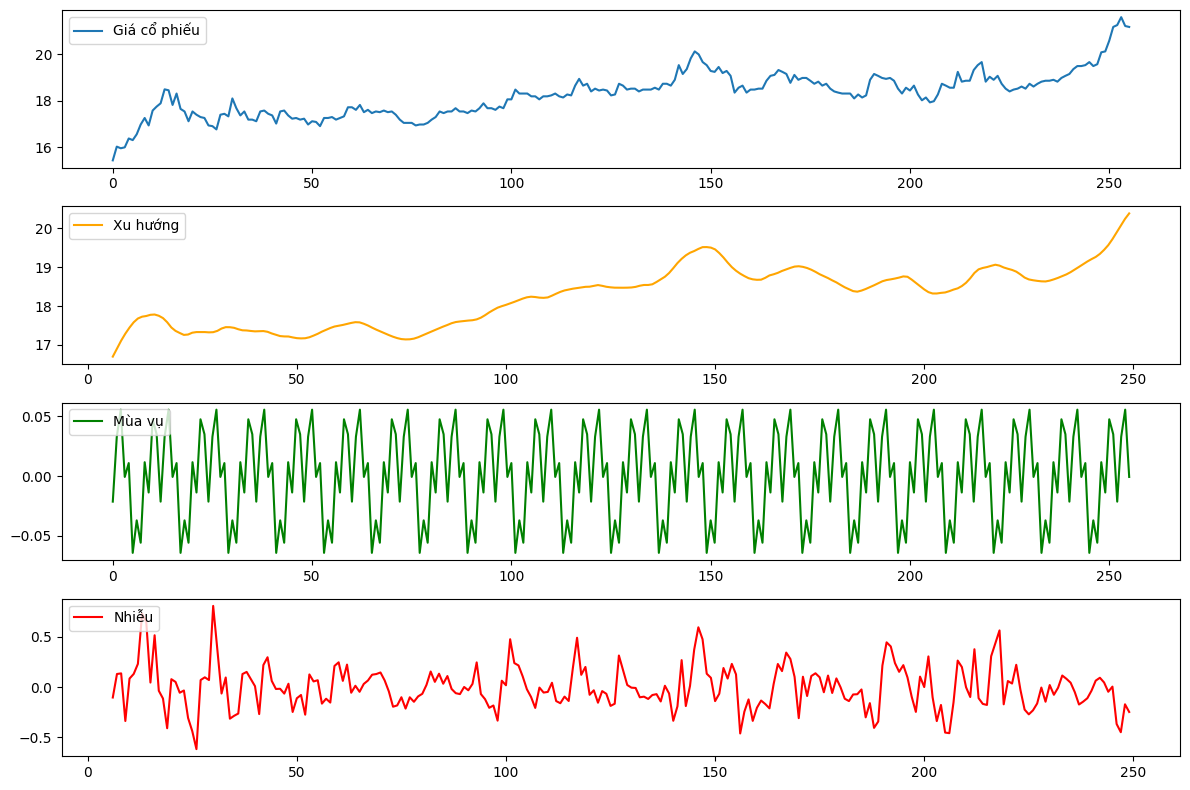

In [74]:
# Áp dụng Seasonal Decomposition để phân tích các thành phần của chuỗi thời gian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv("data/ACB_VCI_2023-01-01_2024-01-10.csv")

decomposition = seasonal_decompose(df["open"], model="additive", period=12)
trend_part = decomposition.trend
seasonal_part = decomposition.seasonal
residual_part = decomposition.resid

# Vẽ đồ thị các thành phần
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(df["open"], label="Giá cổ phiếu")
plt.legend(loc="upper left")
plt.subplot(4, 1, 2)
plt.plot(trend_part, label="Xu hướng", color="orange")
plt.legend(loc="upper left")
plt.subplot(4, 1, 3)
plt.plot(seasonal_part, label="Mùa vụ", color="green")
plt.legend(loc="upper left")
plt.subplot(4, 1, 4)
plt.plot(residual_part, label="Nhiễu", color="red")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

Biểu đồ mùa vụ : 
+ Cho thấy sự dao động theo hcu kỳ lặp lại đều đặn theo thời gian, mỗi đợt lên xuống trên biểu đồ biểu thị một chu kỳ của giá cổ phiếu theo mùa vụ
+ Nhận xét: Các đỉnh và đáy xuất hiện đều đặn, chứng tỏ rằng dữ liệu có đặc điểm chu kỳ rõ ràng. Điều này có thể phản ánh các yếu tố thời gian nhất định, như các giai đoạn trong năm, tuần, hoặc tháng mà thị trường thường có xu hướng tăng hoặc giảm giá. Ví dụ, thị trường có thể tăng vào cuối năm do các hoạt động chi tiêu và đầu tư nhiều hơn, trong khi những khoảng thời gian khác giá có thể thấp hơn. Thành phần mùa vụ giúp mô hình nhận diện và dự đoán các biến động chu kỳ này, nâng cao khả năng dự đoán chính xác khi đến những thời điểm có tính chất tương tự trong tương lai.

Biểu đồ nhiễu :
+ Cho thấy các biến động ngẫu nhiên không tuân theo quy luật chu kỳ hay xu hướng cụ thể. Đường màu đỏ dao động thất thường và không có mẫu hình lặp lại rõ ràng.
+ Nhận xét: Thành phần nhiễu biểu thị các yếu tố bất thường ảnh hưởng đến giá cổ phiếu trong ngắn hạn, chẳng hạn như các tin tức bất ngờ, sự kiện đột xuất hoặc các biến động không liên quan đến xu hướng dài hạn hay mùa vụ. Phần nhiễu thường không thể dự đoán một cách dễ dàng vì nó phản ánh các yếu tố ngẫu nhiên. Tuy nhiên, khi tách phần nhiễu ra khỏi các thành phần còn lại, mô hình sẽ tập trung tốt hơn vào xu hướng và chu kỳ, từ đó giúp giảm thiểu ảnh hưởng của các dao động bất ngờ và cải thiện khả năng dự đoán.

Chu kỳ chuẩn hóa : 
- Theo ngày/tuần/tháng/quý: Bạn có thể chuẩn hóa dữ liệu theo chu kỳ (ví dụ: lấy giá trị trung bình mỗi tuần hoặc mỗi tháng).
- Seasonal Normalization: Chuẩn hóa theo mùa vụ, đặc biệt quan trọng trong các ngành có tính chu kỳ (ví dụ: nông nghiệp, du lịch, bán lẻ).
- Smoothing over Periods (Làm mượt theo chu kỳ): Sử dụng các kỹ thuật làm mượt như Exponential Moving Average (EMA) để loại bỏ các biến động ngắn hạn, giúp mô hình tập trung vào xu hướng dài hạn.

Synthetic Data Generation (Sinh dữ liệu tổng hợp): Sử dụng các mô hình như GANs (Generative Adversarial Networks) hoặc VAEs (Variational Auto-Encoders) để tạo ra dữ liệu tổng hợp dựa trên dữ liệu ban đầu

Các Augment khác

In [12]:
import pandas as pd 
import numpy  as np
df = pd.read_csv("data/ACB_VCI_2024-06-01_2024-10-28.csv")
def augment_financial_data(df, noise_std_price=1, noise_std_volume=50, scaling_factor_range=(0.95, 1.05)):
    """
    Áp dụng nhiều kỹ thuật Data Augmentation lên dữ liệu tài chính
    :param df: DataFrame chứa dữ liệu tài chính với cột 'price' và 'volume'
    :param noise_std_price: Độ lệch chuẩn cho nhiễu ngẫu nhiên thêm vào giá
    :param noise_std_volume: Độ lệch chuẩn cho nhiễu ngẫu nhiên thêm vào khối lượng giao dịch
    :param scaling_factor_range: Khoảng tỷ lệ biến động cho phương pháp scaling
    :return: DataFrame với các cột augmented bổ sung
    """
    augmented_df = df.copy()
    
    # 1. Thêm nhiễu (noise) vào giá và khối lượng giao dịch
    np.random.seed(42)  # Đảm bảo kết quả có thể lặp lại
    price_noise = np.random.normal(0, noise_std_price, augmented_df['open'].shape)
    volume_noise = np.random.normal(0, noise_std_volume, augmented_df['volume'].shape)
    
    augmented_df['augmented_price_noise'] = augmented_df['open'] + price_noise
    augmented_df['augmented_volume_noise'] = augmented_df['volume'] + volume_noise
    
    # 2. Thay đổi tỷ lệ biến động (Scaling)
    scaling_factor = np.random.uniform(scaling_factor_range[0], scaling_factor_range[1], augmented_df['open'].shape)
    
    augmented_df['augmented_price_scaled'] = augmented_df['open'] * scaling_factor
    augmented_df['augmented_volume_scaled'] = augmented_df['volume'] * scaling_factor
    
    # 3. Chu kỳ dữ liệu (có thể thực hiện bằng rolling)
    augmented_df['augmented_price_rolling_mean'] = augmented_df['open'].rolling(window=3, min_periods=1).mean()
    
    # 4. Time-Warping: Xáo trộn thứ tự thời gian
    shuffled_df = augmented_df.sample(frac=1).reset_index(drop=True)
    augmented_df['augmented_price_shuffled'] = shuffled_df['open']
    augmented_df['augmented_volume_shuffled'] = shuffled_df['volume']
    
    return augmented_df

# Áp dụng hàm lên df chứa dữ liệu tài chính

augmented_df = augment_financial_data(df)
augmented_df[['open',"augmented_price_noise","augmented_price_scaled",'augmented_price_rolling_mean','augmented_price_shuffled']]

# Thêm nhiễu (Noise) vào dữ liệu giá:
# Một cách đơn giản để tăng kích thước tập dữ liệu là thêm nhiễu ngẫu nhiên vào các giá trị dữ liệu ban đầu. Ví dụ, bạn có thể thêm một lượng nhỏ biến động ngẫu nhiên vào giá cổ phiếu hoặc khối lượng giao dịch để tạo ra các phiên bản dữ liệu mới.
# Nhiễu có thể được tạo ra bằng cách thêm các giá trị từ một phân phối chuẩn (Gaussian noise) hoặc phân phối chuẩn hóa theo các tham số cụ thể.
# Ví dụ: nếu giá cổ phiếu ban đầu là 100, bạn có thể thêm một mức biến động ngẫu nhiên từ -0.5% đến +0.5% để tạo ra các giá trị mới như 99.5 hoặc 100.5.
# 2. Thay đổi tỷ lệ biến động (Scaling):
# Thay đổi tỷ lệ biến động là một cách khác để tăng cường dữ liệu. Điều này có thể thực hiện bằng cách nhân dữ liệu hiện tại với một hệ số ngẫu nhiên.
# Ví dụ, bạn có thể tăng hoặc giảm toàn bộ dãy giá trị giá cổ phiếu theo một tỷ lệ nhất định, giả định rằng đó là một kịch bản biến động khác của thị trường.
# Nếu thị trường bình thường dao động trong khoảng ±2% mỗi ngày, bạn có thể tạo ra các tập dữ liệu giả định với biên độ dao động ±1% hoặc ±5%.
# 3. Thay đổi chu kỳ dữ liệu:
# Một phương pháp khác là tạo ra các chuỗi dữ liệu mới bằng cách kéo dài hoặc rút ngắn các chu kỳ biến động.
# Ví dụ: nếu một cổ phiếu có xu hướng tăng dần trong vòng 7 ngày, bạn có thể thử nghiệm bằng cách rút ngắn hoặc kéo dài xu hướng đó thành 5 ngày hoặc 10 ngày để mô phỏng các biến động nhanh hơn hoặc chậm hơn.
# Cách này giúp mô hình học cách phản ứng với các trường hợp thị trường biến động với các tốc độ khác nhau.
# 4. Xáo trộn thứ tự dữ liệu (Time-Warping):
# Một kỹ thuật khác là Time-Warping, tức là thay đổi thứ tự thời gian của các sự kiện. Thay vì giữ nguyên thứ tự thời gian ban đầu của các phiên giao dịch, bạn có thể thay đổi thứ tự một cách ngẫu nhiên để tạo ra các kịch bản thị trường giả lập khác nhau.
# Điều này giúp mô hình không bị phụ thuộc quá nhiều vào trình tự thời gian của dữ liệu gốc.

,open,augmented_price_noise,augmented_price_scaled,augmented_price_rolling_mean,augmented_price_shuffled
0,24.85,25.346714,25.762175,24.850000,23.80
1,24.80,24.661736,25.824837,24.825000,24.85
2,24.75,25.397689,24.778072,24.800000,23.60
3,24.40,25.923030,24.403700,24.650000,23.80
4,24.55,24.315847,25.282315,24.566667,23.60
...,...,...,...,...,...
99,25.80,25.565413,24.557012,26.016667,24.40
100,25.40,23.984629,24.369885,25.733333,24.50
101,25.40,24.979355,25.864837,25.533333,25.50
102,25.00,24.657285,23.927972,25.266667,24.40
